

# Project: Investigate a Medical Appointment (No-Shows Dataset)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

I am trying to investigate the medical appointment (no-shows dataset) to find out the reasons why patients miss their appointments.
* dataset contains 14 columns and 110527 rows. 
* the column names are ( PatientId, 	AppointmentID, 	Gender	, ScheduledDay, 	AppointmentDay,Age	, Neighbourhood	, Scholarship, 	Hipertension, 	Diabetes,	Alcoholism,	Handcap	,SMS_received,	No-show)

We're going to use this data to help the hospital figure out why patients don't show up for their appointments by answering some questions that we found it may help.

1- Is there a specific (day) of the week when patients are absent from their appointments?

2- Does the waiting time between booking the appointment and the date of the appointment affect absence and attendance? 

3- Does receiving text message before the appointment help patients attend their appointments? 

In [5]:
import pandas as pd   #importing libraries.
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 
%matplotlib inline 

Reading the file and explore the dataset. 

In [6]:
df=pd.read_csv('appoi.csv')   #reading the csv file
df.head(5) #the first five colunms 

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [7]:
df.shape #  number of rows and columns

(110527, 14)

In [11]:
df.info()  # to check the data type

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [10]:
df['patientid'].duplicated().sum()   # want to know if there are patients who have booked more than one appointment.

48228

In [12]:
df.isnull().sum()   # to check if there null values

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

In [17]:
df.duplicated().sum()  # check duplicated rows

0



### Data Cleaning 

In [8]:
df.columns= df.columns.str.lower() # to make it easier to deal with columns, they must be converted to lowercase letters.
df.head(1)

,patientid,appointmentid,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No


In [9]:
df.rename(columns={"no-show": "absence"}, inplace = True) #  I decided to change the name of the last column to make it more clear when we read it.
df.head(1)

,patientid,appointmentid,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,absence
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No


The ScheduledDay and AppointmentDay column needs to change the data type to DateTime.

In [10]:
df['scheduledday'] = df['scheduledday'].astype('datetime64[ns]') #changing the datatype 
df['appointmentday'] = df['appointmentday'].astype('datetime64[ns]')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   patientid       110527 non-null  float64       
 1   appointmentid   110527 non-null  int64         
 2   gender          110527 non-null  object        
 3   scheduledday    110527 non-null  datetime64[ns]
 4   appointmentday  110527 non-null  datetime64[ns]
 5   age             110527 non-null  int64         
 6   neighbourhood   110527 non-null  object        
 7   scholarship     110527 non-null  int64         
 8   hipertension    110527 non-null  int64         
 9   diabetes        110527 non-null  int64         
 10  alcoholism      110527 non-null  int64         
 11  handcap         110527 non-null  int64         
 12  sms_received    110527 non-null  int64         
 13  absence         110527 non-null  object        
dtypes: datetime64[ns](2), float64(1), in

create new column for the days ( Sunday , Monday ..)

In [12]:
df['weekday']=df['appointmentday'].apply(lambda x: x.strftime('%A'))
df.head(1)

,patientid,appointmentid,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no-show,weekday
0,2.987250e+13,5642903,F,2016-04-29 18:38:08,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No,Friday


<a id='eda'></a>
## Exploratory Data Analysis

>


### Is there a day when there is more absence than others ?


In [7]:
df['absence'].replace(['No', 'Yes'], [0,1], inplace = True)

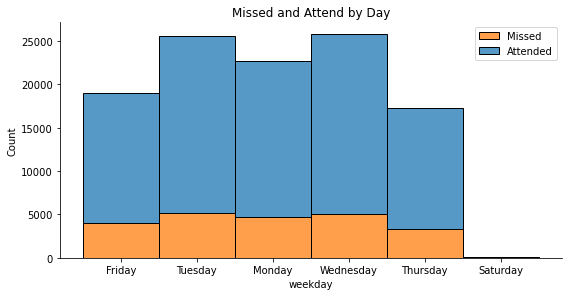

In [52]:
Histo=sns.displot(df, x="weekday", hue="absence", multiple="stack", discrete=True, legend=False, palette=None, height=4, aspect= 2).set(title='Missed and Attend by Day', xlabel='weekday');
plt.legend(labels=["Missed","Attended"])
plt.show()

As shown in the histogram, there is no particular day in which absenteeism is significant.
It is clear that there are no many appointments on Saturdays
While there are more appointments on Thursday and Wednesday. 


### Does the waiting time between booking the appointment and the date of the appointment affect absence and attendance? 

#### I need new column to calculate the difference between the day the appointment was made and the appointment day. 

In [50]:
df['waiting_time'] = df['appointmentday'] - df['scheduledday']
df['waiting_time'] = df['waiting_time'].dt.days

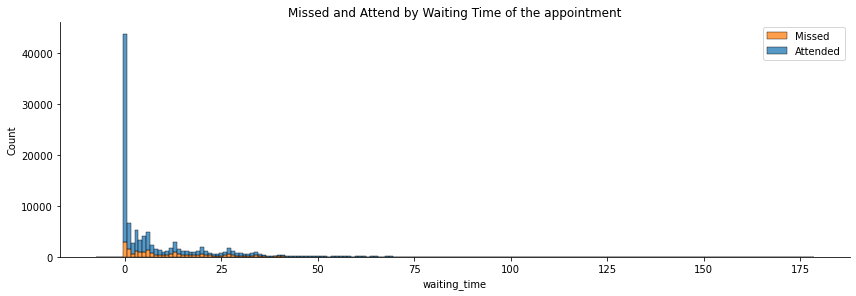

In [58]:
Histo=sns.displot(df, x="waiting_time", hue="absence", multiple="stack", discrete=True, legend=False, palette=None, height=4, aspect= 3).set(title='Missed and Attend by Waiting Time of the appointment', xlabel='waiting_time');
plt.legend(labels=["Missed","Attended"])
plt.show()

####  as you can see , Waiting less than a day helps patients attend their appoinments. 

### knowing more about patients ages 

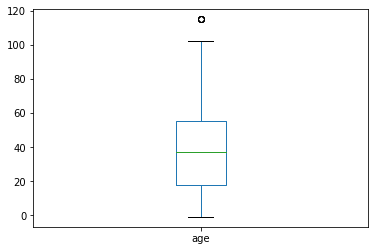

In [14]:
df['age'].plot(kind='box');

#The one outlier shown on the graph is for age greater than 100 years. 
The lowest age is found in 0 years. that mean we have babies ! 
The third quartile for age is about 58 years old 
the median for age is about 38 years old

## Does receiving a message before the appointment help patients attend their appointments? 

In [40]:
show_up = df.query('absence == 0' )
no_showup = df.query('absence == 1' )


mean_sms_show = show_up['sms_received'].mean()
mean_sms_no_show = no_showup['sms_received'].mean()

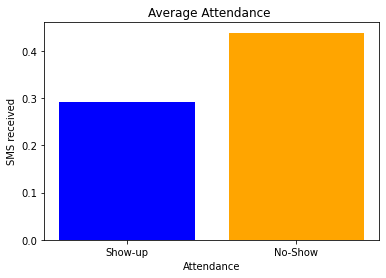

In [42]:
locations = [1, 2]
heights = [mean_sms_show, mean_sms_no_show]
labels = ['Show-up', 'No-Show']
plt.bar(locations, heights, tick_label=labels , color = ['blue', 'orange'])
plt.title('Average Attendance ')
plt.xlabel('Attendance')
plt.ylabel('SMS received');

It seems that receiving a message does not help in getting the patient to come to their appointment. 


## Limitations 

**  Lack of Resources :

To be more precise,  We need to know when the message was sent to make sure it has an effect. 

<a id='conclusions'></a>
## Conclusions

 


Our data does not indicate that there are certain days when no-shows are evident. On Tuesday and Wednesday there are more appointments than on other days. And on Saturday, the appointments are less compared to the days of the week.

Patients tend to attend if the waiting time between booking reservation and the appointment is less than a day.


Unfortunately, receiving a message reminder does not increase the chances of attending the appointment.
I suggest that the time of receiving the message affects the non-attendance, but the data available to us does not indicate the time of sending the reminders, is it close to the time of the appointment or far away.
